In [1]:
import findspark
findspark.init()
import pyspark as ps

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
spark = ps.sql.SparkSession.builder \
    .master("local[4]") \
    .appName("Spark") \
    .getOrCreate()

In [4]:
sc = spark.sparkContext

In [53]:
import random

def add_numbers(dice):
    total = dice[0] + dice[1]
    return [dice[0],dice[1],total]

op = sc.parallelize(range(100)) \
        .map(lambda x: (random.randint(1,6), random.randint(1,6))) \
        .map(add_numbers) \
        .collect()

In [54]:
df = pd.DataFrame(op, columns = ['Dice 1', 'Dice 2', 'Total = D1+D2'])

In [55]:
df

,Dice 1,Dice 2,Total = D1+D2
0,5,5,10
1,1,2,3
2,5,3,8
3,1,6,7
4,6,3,9
...,...,...,...
95,3,3,6
96,5,4,9
97,3,3,6
98,2,3,5


array([[<AxesSubplot:title={'center':'Total = D1+D2'}>]], dtype=object)

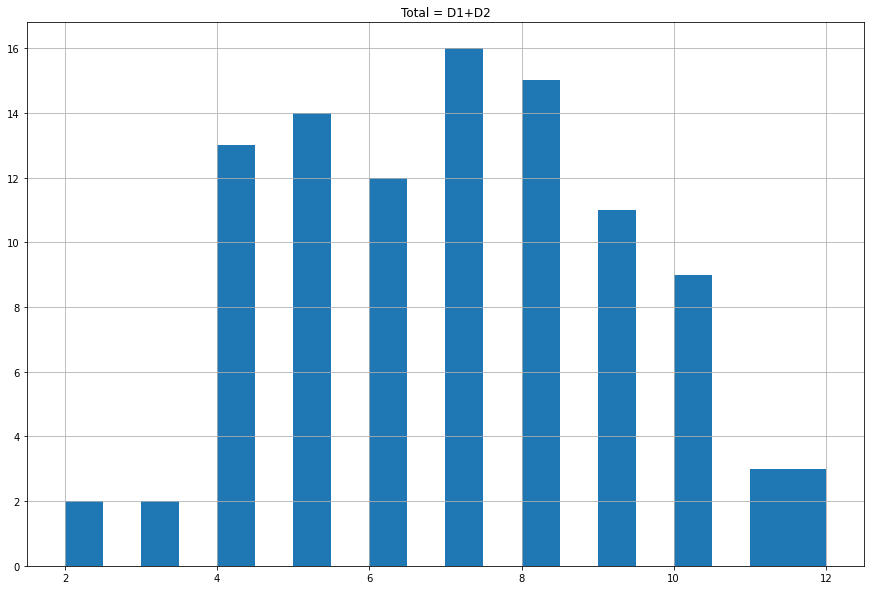

In [72]:
df.hist(column='Total = D1+D2', bins=20, figsize=(15,10))